In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
libor_i=0.0424 ## Current 1 year treasury yield
b_mat=30
bcr=0.0425
cpy=2
bp=100

In [3]:
def dollar_duration(maturity,face_value,coupon_rate,yield_rate,compounding):
    t=list(range(1,(maturity*compounding)+1))
    yld=yield_rate/compounding
    cpnr=coupon_rate/compounding
    cpnr_payment=face_value*cpnr
    bond_cf=[cpnr_payment]*len(t)
    bond_cf[len(t)-1]=bond_cf[len(t)-1]+face_value
    B=0
    D=0
    for i in range(1,len(t)+1):
        B+=bond_cf[i-1]/(1+yld)**i
    for j in range(1,len(t)+1):    
        D+=(j*bond_cf[j-1])*0.0001/(((1+yld)**(j+1))*compounding)
    D1=D/B
    return B,D,bond_cf,D1

Text(0, 0.5, 'Interest Rate')

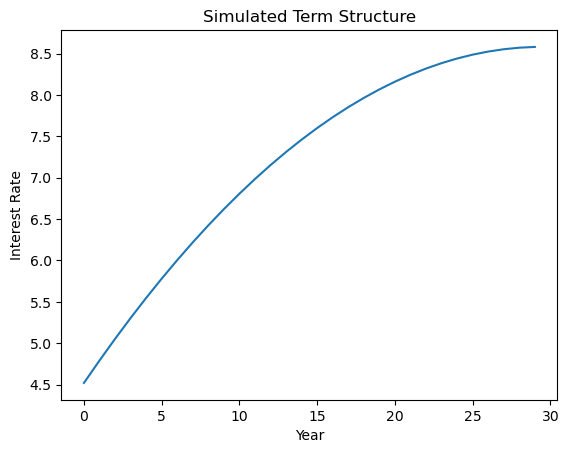

In [4]:
li=[]
lit=libor_i
step=(0.0438-0.0410)/30
for i in range(b_mat):
    lit=lit+step*(b_mat-i)
    li.append(lit)
l=len(li)
g=[r*100 for r in li]    
plt.plot(g)
plt.title("Simulated Term Structure")
plt.xlabel("Year")
plt.ylabel("Interest Rate")

Text(0, 0.5, 'Years to Maturity')

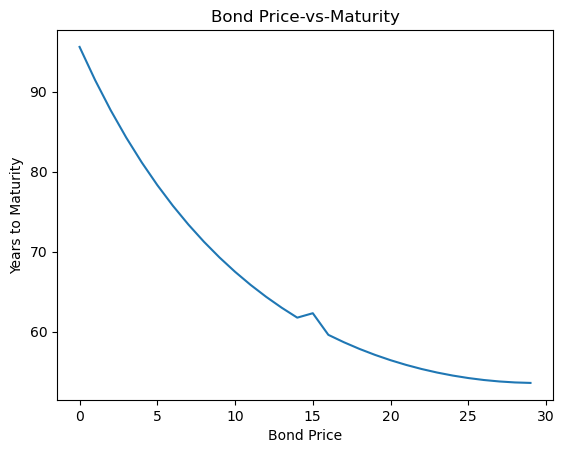

In [5]:
b=[]
dd=[]
d=[]
for k in range(l):
    b1,d1,cf1,d2=dollar_duration(b_mat,bp,bcr,li[k],cpy)
    if k==15:
        cf2=cf1[:k*cpy]
        cf2[len(cf2)-1]=cf2[len(cf2)-1]+bp
        B1=0
        D1=0
        b2,d2,cf3,d3=dollar_duration(b_mat-k,bp,li[k]+0.035,li[k],cpy) ## reinvested bond
        for i1 in range(1,k+1):
            B1+=cf2[i1-1]/(1+li[k])**i1
        for j1 in range(1,k+1):    
            D1+=(j1*cf2[j1-1])**0.0001/(((1+li[k])**(j1+1))*cpy)
        B3=B1+b2/(1+li[k])**k
        D2=D1/B3
        b.append(B3)
        dd.append(D1)
        d.append(D2)
    else:
        b.append(b1)
        dd.append(d1)
        d.append(d2)        
plt.plot(b)
plt.title("Bond Price-vs-Maturity")
plt.xlabel("Bond Price")
plt.ylabel("Years to Maturity")

Text(0, 0.5, 'DV01')

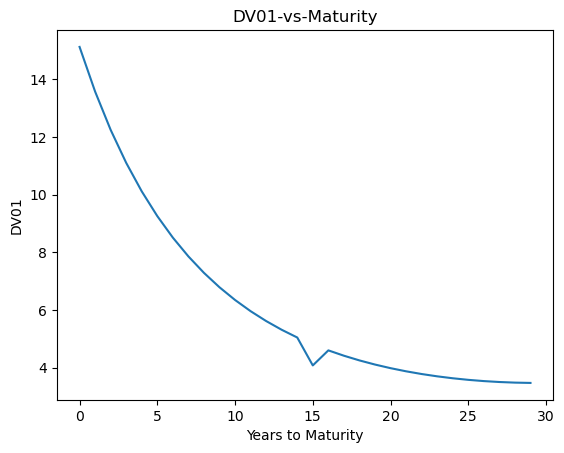

In [6]:
plt.plot(dd)
plt.title("DV01-vs-Maturity")
plt.xlabel("Years to Maturity")
plt.ylabel("DV01")

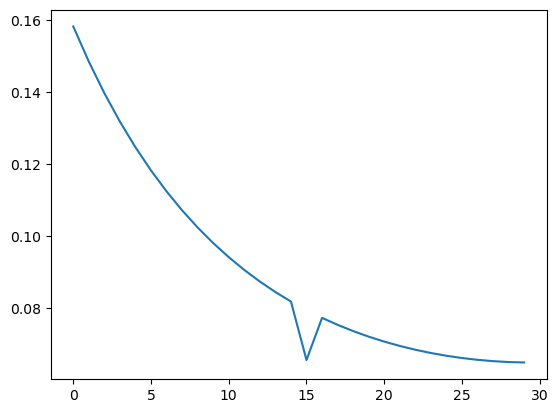

In [7]:
plt.plot(d)

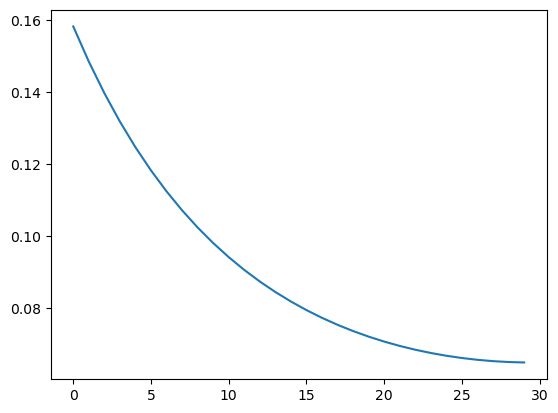

In [8]:
f=[]
m=[]
for k in range(l):
    b1,d1,cf1,d2=dollar_duration(b_mat,bp,bcr,li[k],cpy)
    f.append(d2)
    m.append(d1)
plt.plot(f)

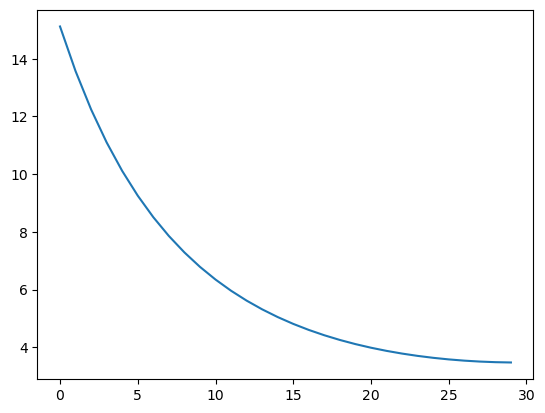

In [9]:
plt.plot(m)